<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Unsupervised_Learning_K_Mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 Filter out employees and short-duration visitors Exclude all records where the employee_flag is set or the total duration of the visit is less than 30 minutes (i.e., less than 1800 seconds). Use the filtered data for all subsequent segmentation and analysis.

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np

In [ ]:
#opening the file moa_analytics which is in .xlsx format
df = pd.read_excel('moa_customer_segments_2.xlsx')

In [ ]:
df_filtered = df[(df['employee_flag'] == 0) & (df['duration'] >= 1800)]

In [ ]:
df_filtered

,device,session_date,apple_flag,entry_time,exit_time,duration,total_updates,weekend_flag,day_of_week,time_northfoodcourt,...,time_3_NW,time_3_S,time_3_SE,time_3_SW,time_3_W,session_updates_0_1,session_updates_0,employee_flag,theatre_flag,park_flag
0,device:00:c6:10:ab:d8:20,2016-01-01,1,2016-01-01 12:36:29.010,2016-01-01 17:54:10.250,19061.0,35,0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,device:04:4b:ed:06:ee:68,2016-01-01,1,2016-01-01 12:59:53.390,2016-01-01 16:11:50.190,11517.0,137,0,6,0,...,105,2048,0,1511,332,0,0,0,0,0
4,device:0c:15:39:2d:0f:75,2016-01-01,1,2016-01-01 17:06:38.920,2016-01-01 22:50:27.310,20629.0,129,0,6,0,...,48,989,0,1228,42,0,11,0,0,0
5,device:0c:15:39:30:5c:7c,2016-01-01,1,2016-01-01 10:14:17.800,2016-01-01 11:17:09.490,3772.0,29,0,6,0,...,0,264,0,0,0,0,0,0,0,0
6,device:10:a5:d0:d8:55:5a,2016-01-01,0,2016-01-01 15:06:12.890,2016-01-01 17:38:12.470,9120.0,10,0,6,0,...,0,4275,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699,device:f0:99:bf:18:e5:87,2016-04-03,1,2016-04-03 12:28:38.150,2016-04-03 13:22:19.580,3221.0,12,1,1,0,...,0,888,0,0,0,0,0,0,0,0
7700,device:f0:d1:a9:c9:9c:d7,2016-04-03,1,2016-04-03 14:16:55.060,2016-04-03 17:17:15.330,10820.0,67,1,1,0,...,0,0,0,0,489,0,0,0,0,0
7702,device:f4:31:c3:77:9e:5c,2016-04-03,1,2016-04-03 10:13:49.600,2016-04-03 11:51:14.190,5845.0,30,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7703,device:f4:37:b7:69:87:71,2016-04-03,1,2016-04-03 14:57:40.840,2016-04-03 17:33:31.340,9351.0,62,1,1,3540,...,1230,0,0,0,0,0,9,0,0,0


## 1.2 Cluster customers based on time spent across floors Segment customers according to how much time they spend on each floor of the mall (levels 0 to 4). Use appropriate clustering techniques (e.g., k-means with elbow method or silhouette analysis) to determine the optimal number of clusters. Interpret and describe each cluster based on their floor-wise behavior patterns.

In [ ]:
#considering the time spent on each level from 0 to 4. Let's make a seperate dataframe for the columns time_0,time_1,time_2,time_3,time_4
df_time = df_filtered[['time_0','time_1','time_2','time_3','time_4']]
df_time

,time_0,time_1,time_2,time_3,time_4
0,0.0,14403.0,4658,0.0,0
1,0.0,2364.0,4970,4183.0,0
4,1713.0,2572.0,1169,13037.0,2138
5,0.0,1593.0,1915,264.0,0
6,0.0,4845.0,0,4275.0,0
...,...,...,...,...,...
7699,0.0,0.0,2333,888.0,0
7700,0.0,5826.0,4505,489.0,0
7702,0.0,5845.0,0,0.0,0
7703,1018.0,1680.0,0,6653.0,0


As we have got the required data let's use the following method to calculate the number of clusters and also check the quality of the clusters


K-Means with Elbow Method

Quality of clusters
1.  S.Score
2.  CH Index






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Applying K-Means Clustering using elbow method
As the columns to be analysed are four we cannot apply Scatter Plot and find the number of clusters. So, we apply Elbow Method.



#### As an conceptual purpose let's apply scalar plots for any 2 - variables

<Axes: xlabel='time_0', ylabel='time_1'>

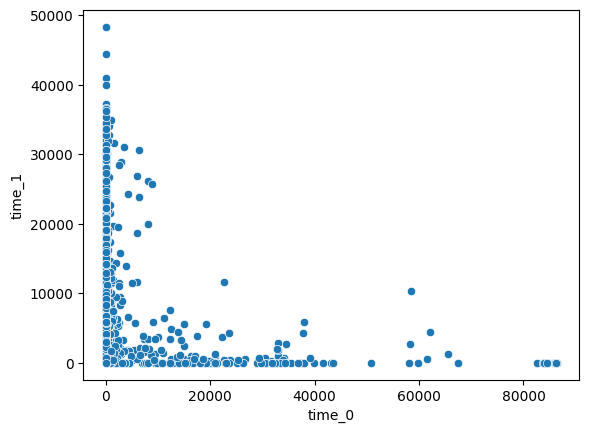

In [ ]:
#Scatter Plot for time_0 and time_1
sns.scatterplot(data =df_time,x= 'time_0',y= 'time_1' )

<Axes: xlabel='time_2', ylabel='time_3'>

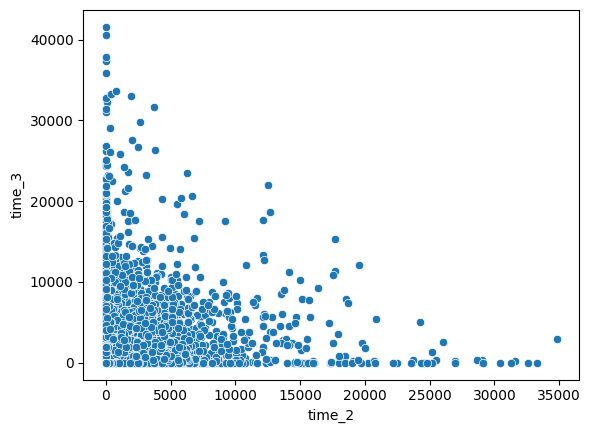

In [ ]:
#Scatter Plot for time_2 and time_3
sns.scatterplot(data =df_time,x= 'time_2',y= 'time_3' )

#### Applying Elbow Method for identifying the number of clusters

*Interia --> It is sum of squared distances from the cluster centre and this inertia is plotted against the cluster range from 1 to 9.*

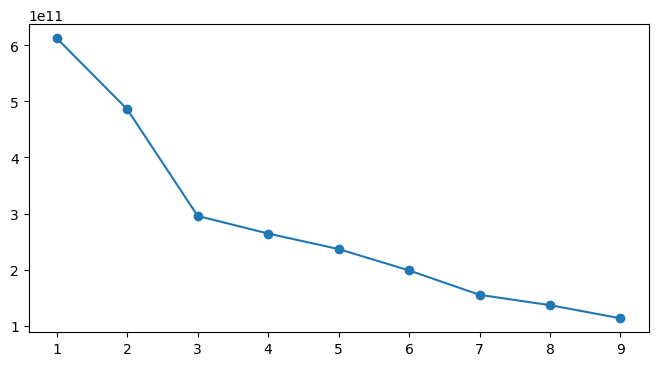

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Import plt for plotting

cluster_range = range( 1, 10 )
cluster_errors = []

# Convert column names to strings
df_time.columns = df_time.columns.astype(str)

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_time )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

From the above image it is clear that there are 6 clusters in the dataset.

Let's apply K-means Algorithm for the 3 clusters that are formed.

*Random State = 42 is nothing but reproducability where if you run the code multiple times still the output remains same.*

In [ ]:
k = 3

clusters = KMeans( k, random_state = 42 )
clusters.fit( df_time )
df_time["clusterid"] = clusters.labels_

In [ ]:
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_time

,time_0,time_1,time_2,time_3,time_4,clusterid
0,0.0,14403.0,4658,0.0,0,0
1,0.0,2364.0,4970,4183.0,0,0
4,1713.0,2572.0,1169,13037.0,2138,0
5,0.0,1593.0,1915,264.0,0,0
6,0.0,4845.0,0,4275.0,0,0
...,...,...,...,...,...,...
7699,0.0,0.0,2333,888.0,0,0
7700,0.0,5826.0,4505,489.0,0,0
7702,0.0,5845.0,0,0.0,0,0
7703,1018.0,1680.0,0,6653.0,0,0


### Evaluating the quality of cluster using Silhouette score

#### Cluster = 0

In [ ]:
df_time[df_time.clusterid == 0]

,time_0,time_1,time_2,time_3,time_4,clusterid
0,0.0,14403.0,4658,0.0,0,0
1,0.0,2364.0,4970,4183.0,0,0
4,1713.0,2572.0,1169,13037.0,2138,0
5,0.0,1593.0,1915,264.0,0,0
6,0.0,4845.0,0,4275.0,0,0
...,...,...,...,...,...,...
7699,0.0,0.0,2333,888.0,0,0
7700,0.0,5826.0,4505,489.0,0,0
7702,0.0,5845.0,0,0.0,0,0
7703,1018.0,1680.0,0,6653.0,0,0


#### Cluster = 1

In [ ]:
df_time[df_time.clusterid == 1]

,time_0,time_1,time_2,time_3,time_4,clusterid
25,82622.0,0.0,0,0.0,0,1
82,86108.0,0.0,0,0.0,0,1
156,83693.0,0.0,0,0.0,0,1
234,85938.0,0.0,0,0.0,0,1
301,84785.0,0.0,0,0.0,0,1
330,86193.0,0.0,0,0.0,0,1
375,86133.0,0.0,0,0.0,0,1
412,86121.0,0.0,0,0.0,0,1
447,85855.0,0.0,0,0.0,0,1
477,85783.0,0.0,0,0.0,0,1


#### Cluster = 2

In [ ]:
df_time[df_time.clusterid == 2]

,time_0,time_1,time_2,time_3,time_4,clusterid
130,13724.0,209.0,542,63.0,0,2
200,16338.0,914.0,0,0.0,0,2
416,32868.0,0.0,0,0.0,0,2
484,17503.0,3796.0,0,35.0,0,2
540,32989.0,2872.0,0,0.0,0,2
...,...,...,...,...,...,...
7530,32866.0,2006.0,1851,514.0,2491,2
7555,31736.0,0.0,0,0.0,0,2
7565,36837.0,0.0,0,0.0,0,2
7576,20989.0,1228.0,0,0.0,0,2


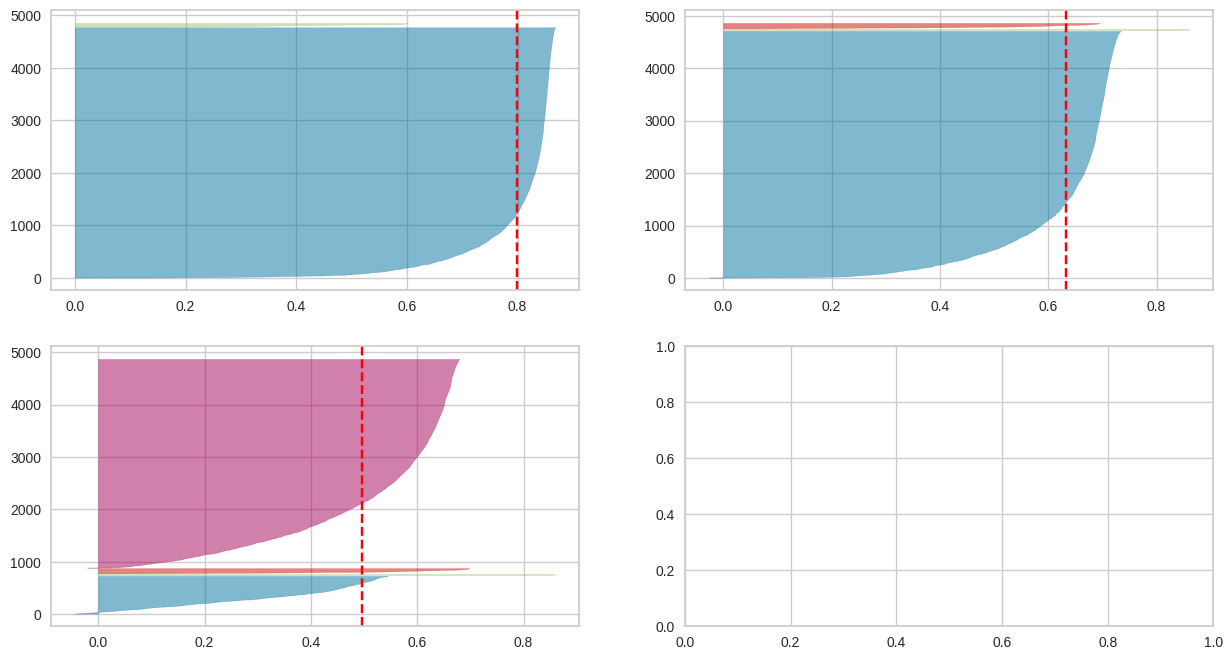

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [2, 3, 4]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q][mod])
    visualizer.fit(df_time)

In [ ]:
for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_time)
    score = silhouette_score(df_time, kmeans.labels_)
    print(f"k = {k}, silhouette_score = {score:.3f}")

k = 2, silhouette_score = 0.800
k = 3, silhouette_score = 0.633
k = 4, silhouette_score = 0.496


Observations:
1.   All clusters have above average S.Score
2.   Majority of the data points are lying one cluster only.

So considering cluster count as 6 and repeating the same procedure



In [ ]:
k = 6

clusters = KMeans( k, random_state = 42 )
clusters.fit( df_time )
df_time["clusterid"] = clusters.labels_

In [ ]:
clusters.labels_

array([4, 3, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
df_time

,time_0,time_1,time_2,time_3,time_4,clusterid
0,0.0,14403.0,4658,0.0,0,4
1,0.0,2364.0,4970,4183.0,0,3
4,1713.0,2572.0,1169,13037.0,2138,0
5,0.0,1593.0,1915,264.0,0,3
6,0.0,4845.0,0,4275.0,0,3
...,...,...,...,...,...,...
7699,0.0,0.0,2333,888.0,0,3
7700,0.0,5826.0,4505,489.0,0,3
7702,0.0,5845.0,0,0.0,0,3
7703,1018.0,1680.0,0,6653.0,0,3


#### Cluster - 6

In [ ]:
df_time[df_time.clusterid == 5]

,time_0,time_1,time_2,time_3,time_4,clusterid
50,0.0,526.0,10853,3085.0,25888,5
203,0.0,8079.0,6607,201.0,0,5
205,0.0,0.0,15682,0.0,0,5
233,0.0,3132.0,7675,4324.0,0,5
247,0.0,5195.0,7087,1157.0,0,5
...,...,...,...,...,...,...
7630,0.0,0.0,26020,2520.0,0,5
7638,0.0,649.0,24809,0.0,0,5
7639,0.0,0.0,10289,0.0,0,5
7672,279.0,49.0,8194,0.0,0,5


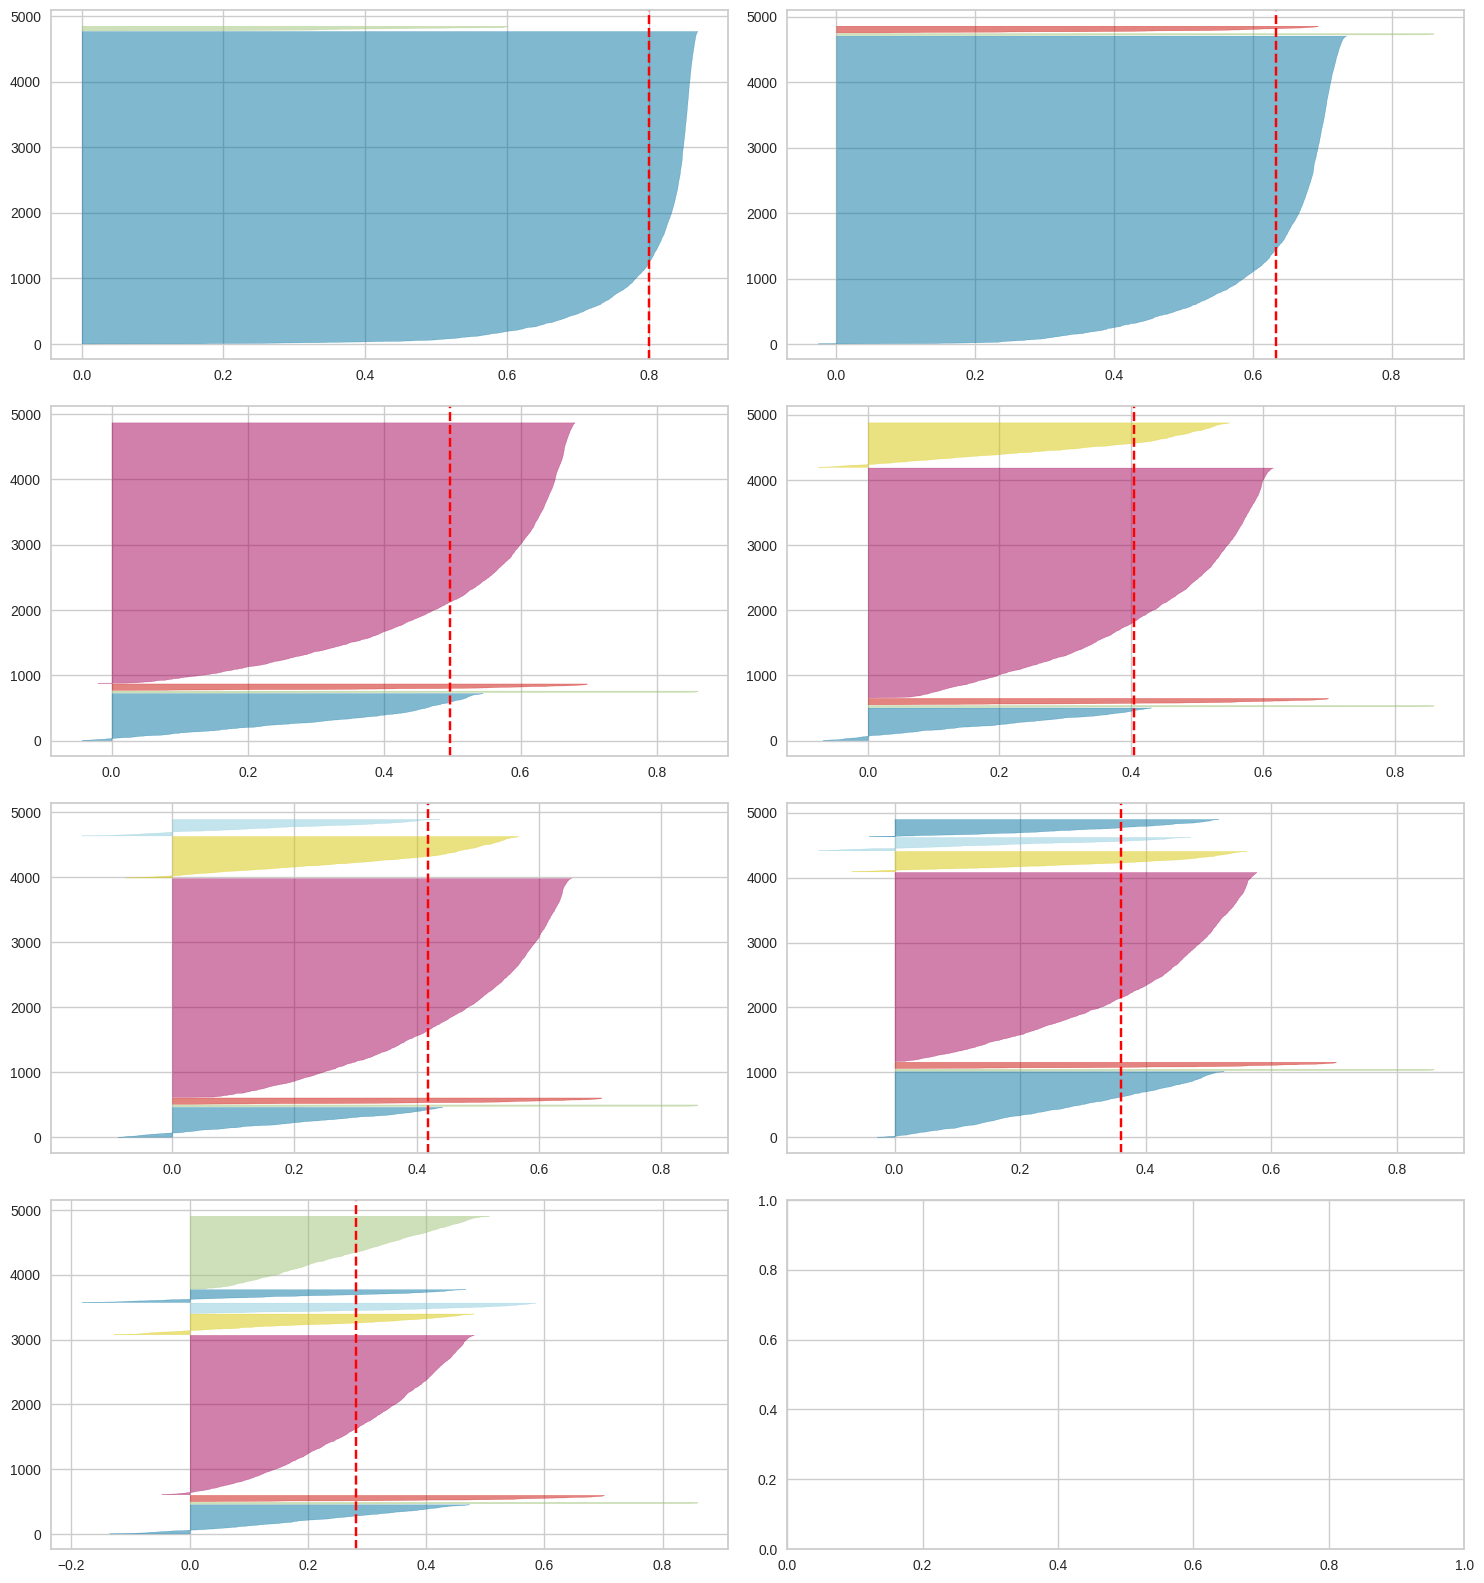

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt # Ensure plt is imported

# Create a 4x2 grid of subplots to accommodate 7 plots
fig, ax = plt.subplots(4, 2, figsize=(15, 16)) # Increased figure size

num_clusters = [2, 3, 4, 5, 6, 7, 8]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    # Calculate the row and column index for the 4x2 grid
    q, mod = divmod(i, 2)
    # Flatten the 2D array of axes objects for easier indexing
    ax = ax.flatten()
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[i]) # Use the loop index directly for the flattened array
    visualizer.fit(df_time)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

The above clusters shows there are narrow thin layers which indicates outliers and also some clusters are going with negative scores as well.

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_time)
    score = silhouette_score(df_time, kmeans.labels_)
    print(f"k = {k}, silhouette_score = {score:.3f}")

k = 2, silhouette_score = 0.800
k = 3, silhouette_score = 0.633
k = 4, silhouette_score = 0.496
k = 5, silhouette_score = 0.404
k = 6, silhouette_score = 0.418
k = 7, silhouette_score = 0.361
k = 8, silhouette_score = 0.282


### CH-Index

In [ ]:
cluster_range = range( 2, 5 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, random_state = 42 )
  clusters.fit( df_time )
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(df_time, clusters.labels_)}" )

n_cluster: 2 - CH Score: 2204.95792128752
n_cluster: 3 - CH Score: 1562.3072588265204
n_cluster: 4 - CH Score: 2368.247131841885


CH index is another method to identify the quality of cluster. Higher the value of CH Index better the quality of cluster.

## 1.3 Investigate whether Apple users (apple_flag = 1) exhibit different time-spending behavior compared to non-Apple users across clusters. For each segment, compare the average time spent on each floor by Apple and non-Apple users to identify any noticeable patterns.

In [ ]:
#Writing a code to consider data from df_filtered and seperate it into 2 dataframes one with apple user and other with non-apple user
apple_users = df_filtered[df_filtered['apple_flag'] == 1]
non_apple_users = df_filtered[df_filtered['apple_flag'] == 0]

In [ ]:
apple_users

,device,session_date,apple_flag,entry_time,exit_time,duration,total_updates,weekend_flag,day_of_week,time_northfoodcourt,...,time_3_NW,time_3_S,time_3_SE,time_3_SW,time_3_W,session_updates_0_1,session_updates_0,employee_flag,theatre_flag,park_flag
0,device:00:c6:10:ab:d8:20,2016-01-01,1,2016-01-01 12:36:29.010,2016-01-01 17:54:10.250,19061.0,35,0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,device:04:4b:ed:06:ee:68,2016-01-01,1,2016-01-01 12:59:53.390,2016-01-01 16:11:50.190,11517.0,137,0,6,0,...,105,2048,0,1511,332,0,0,0,0,0
4,device:0c:15:39:2d:0f:75,2016-01-01,1,2016-01-01 17:06:38.920,2016-01-01 22:50:27.310,20629.0,129,0,6,0,...,48,989,0,1228,42,0,11,0,0,0
5,device:0c:15:39:30:5c:7c,2016-01-01,1,2016-01-01 10:14:17.800,2016-01-01 11:17:09.490,3772.0,29,0,6,0,...,0,264,0,0,0,0,0,0,0,0
8,device:14:10:9f:4e:16:93,2016-01-01,1,2016-01-01 10:13:18.950,2016-01-01 13:30:16.070,11818.0,18,0,6,2956,...,0,0,0,0,1339,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699,device:f0:99:bf:18:e5:87,2016-04-03,1,2016-04-03 12:28:38.150,2016-04-03 13:22:19.580,3221.0,12,1,1,0,...,0,888,0,0,0,0,0,0,0,0
7700,device:f0:d1:a9:c9:9c:d7,2016-04-03,1,2016-04-03 14:16:55.060,2016-04-03 17:17:15.330,10820.0,67,1,1,0,...,0,0,0,0,489,0,0,0,0,0
7702,device:f4:31:c3:77:9e:5c,2016-04-03,1,2016-04-03 10:13:49.600,2016-04-03 11:51:14.190,5845.0,30,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7703,device:f4:37:b7:69:87:71,2016-04-03,1,2016-04-03 14:57:40.840,2016-04-03 17:33:31.340,9351.0,62,1,1,3540,...,1230,0,0,0,0,0,9,0,0,0


In [ ]:
non_apple_users

,device,session_date,apple_flag,entry_time,exit_time,duration,total_updates,weekend_flag,day_of_week,time_northfoodcourt,...,time_3_NW,time_3_S,time_3_SE,time_3_SW,time_3_W,session_updates_0_1,session_updates_0,employee_flag,theatre_flag,park_flag
6,device:10:a5:d0:d8:55:5a,2016-01-01,0,2016-01-01 15:06:12.890,2016-01-01 17:38:12.470,9120.0,10,0,6,0,...,0,4275,0,0,0,0,0,0,0,0
7,device:10:a5:d0:d8:97:7d,2016-01-01,0,2016-01-01 15:32:50.060,2016-01-01 17:55:04.710,8534.0,122,0,6,0,...,0,0,0,35,0,0,0,0,0,0
10,device:1c:62:b8:7c:7c:41,2016-01-01,0,2016-01-01 17:05:31.380,2016-01-01 18:32:24.610,5213.0,12,0,6,0,...,127,2856,0,1536,694,0,0,0,0,0
11,device:1c:62:b8:aa:ab:3e,2016-01-01,0,2016-01-01 11:59:16.690,2016-01-01 14:28:42.900,8966.0,45,0,6,0,...,0,0,0,0,0,0,24,0,0,0
17,device:2c:54:cf:d1:6b:37,2016-01-01,0,2016-01-01 10:33:56.650,2016-01-01 17:18:15.760,24259.0,137,0,6,0,...,0,124,5531,501,2452,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,device:50:2e:5c:28:2d:7e,2016-04-03,0,2016-04-03 17:10:38.390,2016-04-03 19:32:40.780,8522.0,36,1,1,0,...,0,0,0,0,0,0,4,0,0,0
7675,device:64:89:9a:0c:f6:19,2016-04-03,0,2016-04-03 13:36:20.310,2016-04-03 15:17:05.580,6045.0,53,1,1,259,...,0,895,1745,0,0,0,0,0,0,0
7681,device:98:f1:70:45:56:4d,2016-04-03,0,2016-04-03 10:56:23.130,2016-04-03 14:00:58.090,11075.0,21,1,1,0,...,0,1941,0,0,0,0,0,0,0,0
7682,device:9c:d9:17:92:bb:bf,2016-04-03,0,2016-04-03 12:19:29.130,2016-04-03 14:46:12.180,8803.0,12,1,1,0,...,1922,0,2694,0,0,0,0,0,0,1


### Now that we have seperated 2 Data Frames let's calculate average time spent on each level by both apple user's and non-apple user's

In [ ]:
#Calculating average time spent on each level by apple users
apple_user_level_0 = apple_users['time_0'].mean()
apple_user_level_1 = apple_users['time_1'].mean()
apple_user_level_2 = apple_users['time_2'].mean()
apple_user_level_3 = apple_users['time_3'].mean()
apple_user_level_4 = apple_users['time_4'].mean()


In [ ]:
#In a similar way let's calculate the average time spent by non apple user
non_apple_user_level_0 = non_apple_users['time_0'].mean()
non_apple_user_level_1 = non_apple_users['time_1'].mean()
non_apple_user_level_2 = non_apple_users['time_2'].mean()
non_apple_user_level_3 = non_apple_users['time_3'].mean()
non_apple_user_level_4 = non_apple_users['time_4'].mean()

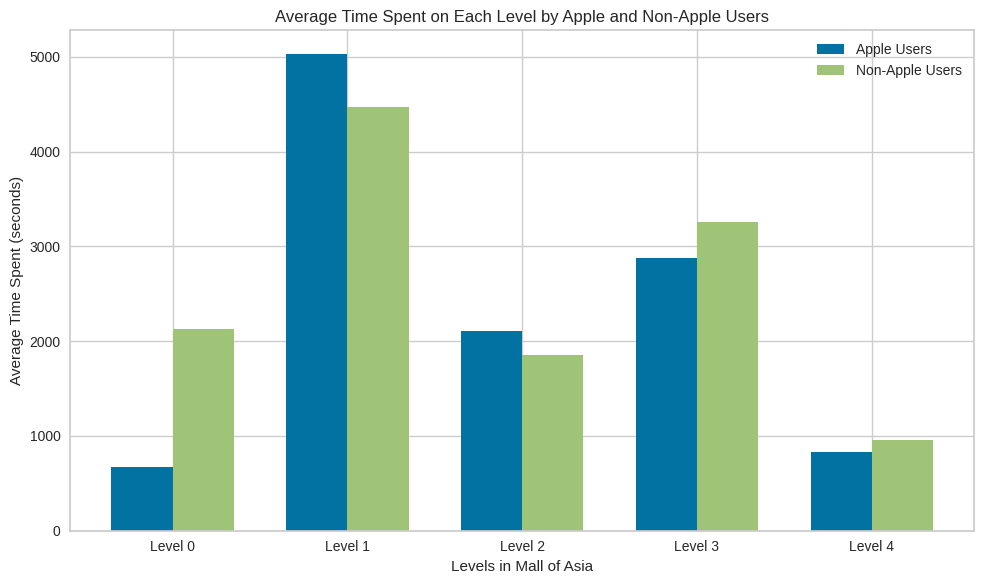

In [ ]:
#Let's plot the values of time spent by apple and non-apple user's against the levels
levels = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4']
apple_users_time = [apple_user_level_0, apple_user_level_1, apple_user_level_2, apple_user_level_3, apple_user_level_4]
non_apple_users_time = [non_apple_user_level_0, non_apple_user_level_1, non_apple_user_level_2, non_apple_user_level_3, non_apple_user_level_4]

#Creating a bar plot with the above data by comparing them beside each other width a bar width of 0.8
x = np.arange(len(levels))
width = 0.35
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.bar(x-width/2,apple_users_time, width=width, label='Apple Users')
plt.bar(x+width/2,non_apple_users_time, width=width, label='Non-Apple Users')
plt.xticks(x, levels)


#Show Plot
plt.xlabel('Levels in Mall of Asia')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Level by Apple and Non-Apple Users')
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Observations:


1.   In Level-0 Apple user's spent least time
2.   In the remaning levels there is not much difference b/w both the apple and non-apple users



### Now let's bring the clusters in place

In [ ]:
#Using the heatmap plot the levels and average time of apple and non-apple users along with cluster id counts
#Moving all the relevant columns of apple_flag to df_time dataframe

df_time['apple_flag'] = df_filtered['apple_flag']


df_time

,time_0,time_1,time_2,time_3,time_4,clusterid,apple_flag
0,0.0,14403.0,4658,0.0,0,4,1
1,0.0,2364.0,4970,4183.0,0,3,1
4,1713.0,2572.0,1169,13037.0,2138,0,1
5,0.0,1593.0,1915,264.0,0,3,1
6,0.0,4845.0,0,4275.0,0,3,0
...,...,...,...,...,...,...,...
7699,0.0,0.0,2333,888.0,0,3,1
7700,0.0,5826.0,4505,489.0,0,3,1
7702,0.0,5845.0,0,0.0,0,3,1
7703,1018.0,1680.0,0,6653.0,0,3,1


Average time spent on each level per cluster:
                 time_0        time_1        time_2        time_3      time_4
clusterid                                                                    
0            223.591703   2725.294760   1530.157205  11938.408297  798.820961
1          78896.413793    663.172414   1865.275862   1272.896552    2.310345
2          25570.567010    795.979381    244.835052    679.865979  614.103093
3            204.449836   2840.068175   1394.359929   1935.952962  960.033343
4            172.416013  17787.627943   1727.229199   2944.992151  634.620094
5            135.218254   4482.853175  12571.642857   2399.480159  742.365079


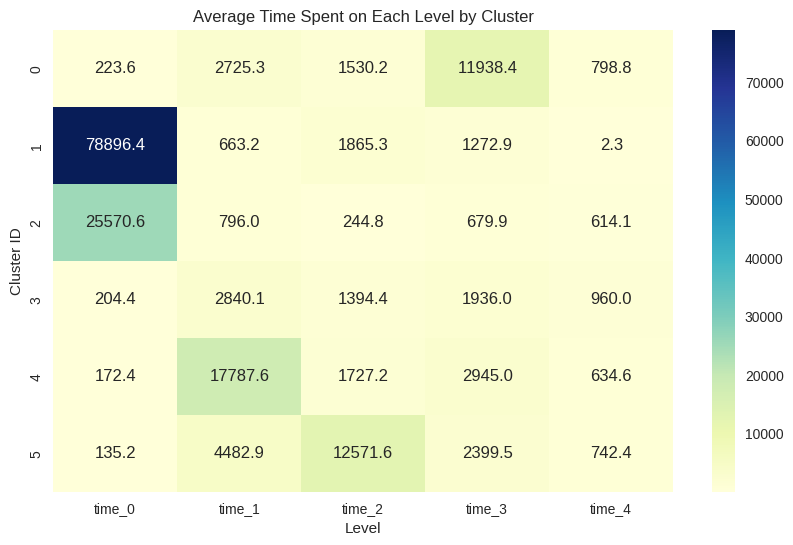

In [ ]:
# The goal is to create a heatmap showing the average time spent on each level per cluster.
# We will use the df_time DataFrame which contains time spent on each level and the clusterid.

# First, calculate the average time spent on each level for each cluster.
# We can group by 'clusterid' and then calculate the mean for each time column.
average_time_per_cluster = df_time.groupby('clusterid')[['time_0','time_1','time_2','time_3','time_4']].mean()

print("Average time spent on each level per cluster:")
print(average_time_per_cluster)

# Now, we can use this aggregated data to create a heatmap.
# The index will be the cluster IDs and the columns will be the levels.

plt.figure(figsize=(10, 6))
sns.heatmap(average_time_per_cluster, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel("Level")
plt.ylabel("Cluster ID")
plt.title("Average Time Spent on Each Level by Cluster")
plt.show()

Observation:

1.   Maximum time is spent on Level-0 by cluster - 1 and 2
2.   Least time is spent on Level-4 by cluster - 4 people





### Let's bring Apple and Non-Apple user's in addition to clusters and Levels

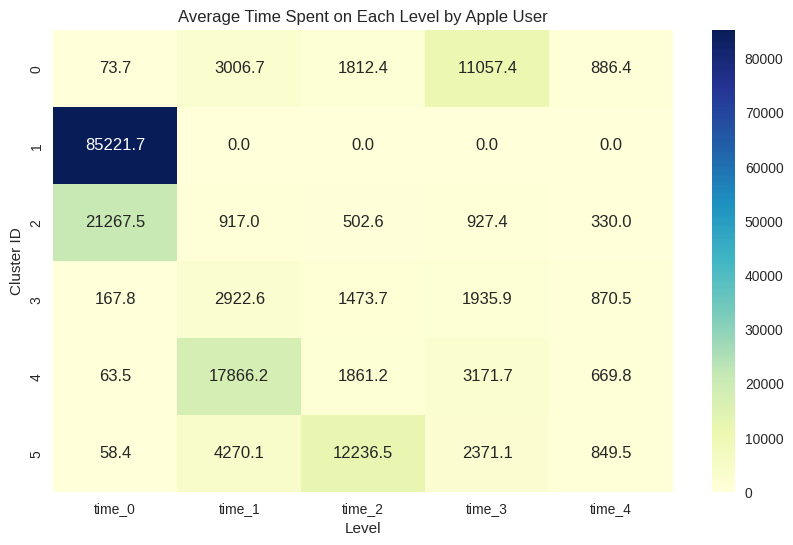

In [ ]:
average_time_apple_users_per_cluster = df_time[df_time['apple_flag'] == 1].groupby('clusterid')[['time_0','time_1','time_2','time_3','time_4']].mean()
average_time_non_apple_users_per_cluster = df_time[df_time['apple_flag'] == 0].groupby('clusterid')[['time_0','time_1','time_2','time_3','time_4']].mean()


plt.figure(figsize=(10, 6))
sns.heatmap(average_time_apple_users_per_cluster, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel("Level")
plt.ylabel("Cluster ID")
plt.title("Average Time Spent on Each Level by Apple User")
plt.show()

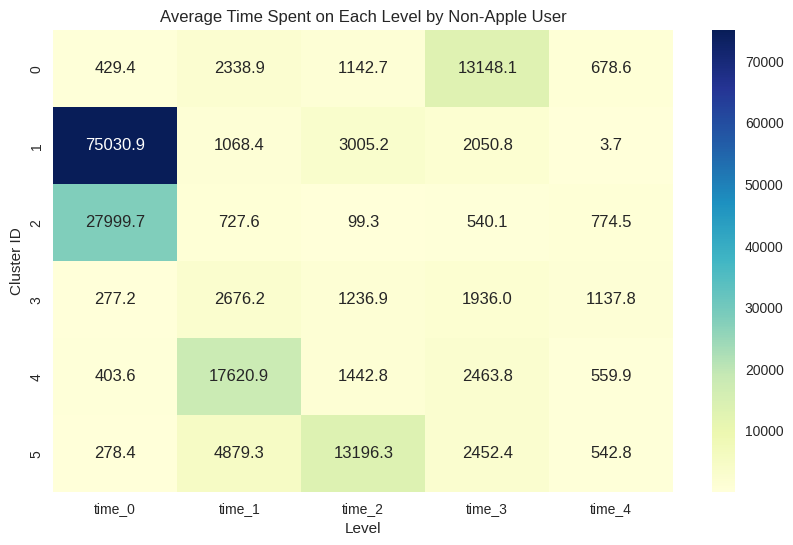

In [ ]:
#Time spent by non-apple user

plt.figure(figsize=(10, 6))
sns.heatmap(average_time_non_apple_users_per_cluster, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel("Level")
plt.ylabel("Cluster ID")
plt.title("Average Time Spent on Each Level by Non-Apple User")
plt.show()

Observations(for both Apple and Non-Apple users) :


1.   More number of people are spending on Level - 0 who comes under cluster-1 &Cluster-2
2.   Least number of people are spending on Level-4 by people under cluster - 5



## 1.4 Identify popular sections within high-dwell floors For clusters that predominantly spend time on Level 2 or Level 3, identify which specific sections (e.g., Section 2 Northeast, Section 3 South) receive the most attention. Highlight the section-wise preferences for each cluster to uncover potential hotspots.

In [ ]:
#Trasferring clusterid column to df_time_2 dataframe
df_time_2['clusterid'] = df_time['clusterid']

#Assigning all the leve-2 areas to df_time_2
df_time_2 = df_filtered[['time_2_E','time_2_N','time_2_NE','time_2_NEx','time_2_NW','time_2_S','time_2_SE','time_2_SW','time_2_W','clusterid']]

df_time_2

,time_2_E,time_2_N,time_2_NE,time_2_NEx,time_2_NW,time_2_S,time_2_SE,time_2_SW,time_2_W,clusterid
0,3804,0,353,0,0,489,0,12,0,4
1,363,0,84,0,0,173,422,2663,1265,3
4,237,77,127,0,65,622,41,0,0,0
5,0,0,0,0,0,470,988,457,0,3
6,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
7699,0,542,1027,0,484,0,0,0,280,3
7700,0,0,0,0,148,600,0,2496,1261,3
7702,0,0,0,0,0,0,0,0,0,3
7703,0,0,0,0,0,0,0,0,0,3


In [ ]:
#Assigning all the leve-3 areas to df_time_3
df_time_3 = df_filtered[['time_3_E','time_3_N','time_3_NE','time_3_NEx','time_3_NW','time_3_S','time_3_SE','time_3_SW','time_3_W']]
df_time_3['clusterid'] = df_time['clusterid']
df_time_3


,time_3_E,time_3_N,time_3_NE,time_3_NEx,time_3_NW,time_3_S,time_3_SE,time_3_SW,time_3_W,clusterid
0,0.0,0,0,0,0,0,0,0,0,4
1,0.0,123,37,0,105,2048,0,1511,332,3
4,19.0,0,10711,0,48,989,0,1228,42,0
5,0.0,0,0,0,0,264,0,0,0,3
6,0.0,0,0,0,0,4275,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
7699,0.0,0,0,0,0,888,0,0,0,3
7700,0.0,0,0,0,0,0,0,0,489,3
7702,0.0,0,0,0,0,0,0,0,0,3
7703,596.0,13,0,3527,1230,0,0,0,0,3


### Time spent on Level-2 among people from different clusters



In [ ]:
#Time spent by cluster on LEVEL-2
average_time_per_cluster_L2 = df_time_2.groupby('clusterid')[['time_2_E','time_2_N','time_2_NE','time_2_NEx','time_2_NW','time_2_S','time_2_SE','time_2_SW','time_2_W']].mean()

print("Average time spent on level-2 per cluster:",average_time_per_cluster_L2)

Average time spent on level-2 per cluster:               time_2_E     time_2_N    time_2_NE  time_2_NEx   time_2_NW  \
clusterid                                                                  
0           225.650655   202.146288   180.325328   35.093886  160.792576   
1            82.344828   755.103448   388.965517  375.103448  263.758621   
2            49.309278     7.340206    11.092784    0.000000   20.690722   
3           238.000595   184.176243   160.817505   20.238464  145.108068   
4           349.248038   271.062794   182.284144   27.813187  150.265306   
5          2076.218254  1214.202381  1085.750000  229.178571  951.960317   

              time_2_S    time_2_SE    time_2_SW     time_2_W  
clusterid                                                      
0           233.703057    82.893013   182.689956   226.862445  
1             0.000000     0.000000     0.000000     0.000000  
2            34.536082    11.103093    92.206186    18.556701  
3           145.562370   101

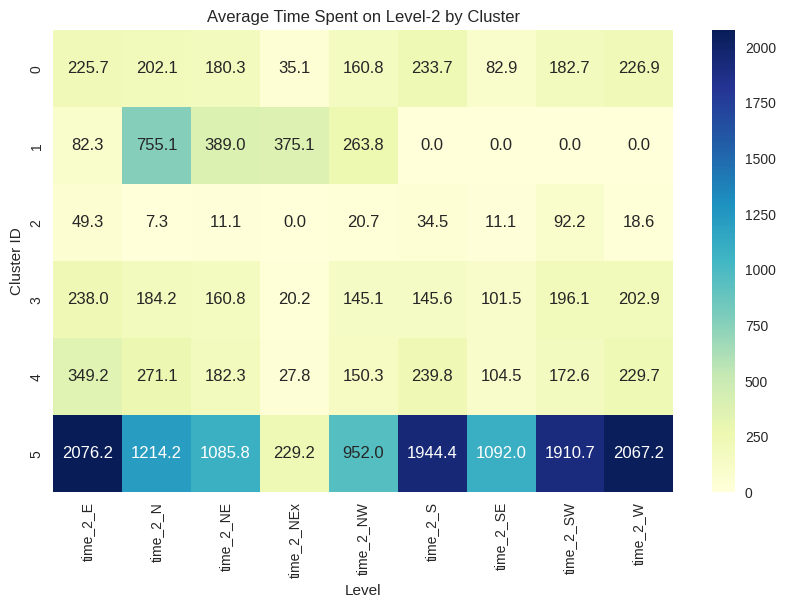

In [ ]:
#Let's plot the heat map for the clusterid and the areas within Level2
plt.figure(figsize=(10, 6))
sns.heatmap(average_time_per_cluster_L2, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel("Level")
plt.ylabel("Cluster ID")
plt.title("Average Time Spent on Level-2 by Cluster")
plt.show()

**Observations**:


1.   Most of the people spent time on East Side in Level -2 and they belong to clusterid 5
2.   Least number of people spent time by both Clusterid - 1


### Time spent on Level-3 among people from different clusters

In [ ]:
#Time spent by cluster on LEVEL-3
average_time_per_cluster_Level3 = df_time_3.groupby('clusterid')[['time_3_E','time_3_N','time_3_NE','time_3_NEx','time_3_NW','time_3_S','time_3_SE','time_3_SW','time_3_W']].mean()

print("Average time spent on level-3 per cluster:",average_time_per_cluster_Level3)

Average time spent on level-3 per cluster:               time_3_E    time_3_N   time_3_NE   time_3_NEx   time_3_NW  \
clusterid                                                                 
0          1066.768559  737.115721  946.978166  1046.155022  909.587336   
1             3.448276  983.896552    8.137931    46.000000   97.413793   
2            79.618557   77.443299   33.371134    61.618557   11.247423   
3           199.706460  118.572194  132.111045   189.519500  143.404882   
4           224.609105  164.733124  182.419152   193.103611  117.620094   
5           217.190476  205.607143   86.869048   284.035714  201.781746   

              time_3_S    time_3_SE    time_3_SW    time_3_W  
clusterid                                                     
0          1964.838428  2571.410480  1817.578603  744.502183  
1             0.000000     0.000000     0.000000    0.000000  
2           136.030928   135.422680    94.237113   46.360825  
3           511.379875   190.561179   286

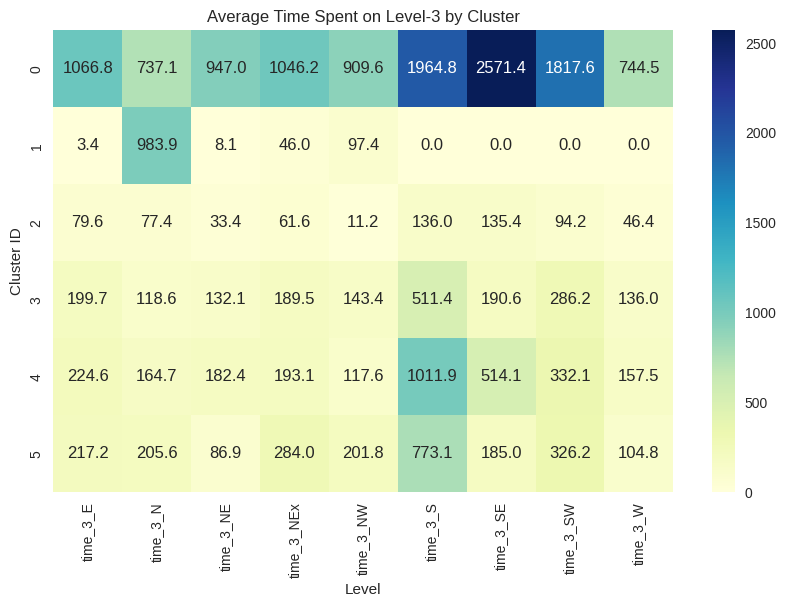

In [ ]:
#Let's plot the heat map for the clusterid and the areas within Level3
plt.figure(figsize=(10, 6))
sns.heatmap(average_time_per_cluster_Level3,annot=True,fmt=".1f", cmap="YlGnBu")
plt.xlabel("Level")
plt.ylabel("Cluster ID")
plt.title("Average Time Spent on Level-3 by Cluster")
plt.show()

**Observations**:


1.  Most of the people spent time on South East side of Level - 3 and these people are from Clusterid 0
2.   Least number of people spent in level-3 are from clusterid 1




## 1.5 Uncover loyalty and repeat visit behavior Identify customers with multiple visits over the 30-day period. Analyze which clusters they belong to and what floor/section patterns are associated with these repeat visits. Investigate whether visits to key attractions like the park, theatre, or food courts correlate with return visits.

In [ ]:


# Ensure datetime format
df_filtered['entry_time'] = pd.to_datetime(df_filtered['entry_time'])
df_filtered['session_date'] = pd.to_datetime(df_filtered['session_date'])

# Step 3: Identify repeat visitors over a rolling 30-day period
df_filtered.sort_values(by=['device'], inplace=True)
df_filtered['repeat_visit'] = df_filtered.groupby('device')['session_date']\
    .transform(lambda x: x.rolling('30D', on=x).count() > 1)

repeat_visitors = df_filtered[df_filtered['repeat_visit']]

# Step 4: Merge with customer segment info
df_merged = pd.merge(repeat_visitors, df_segments, on='device', how='left')

# Step 5: Analyze clusters of repeat visitors
cluster_counts = df_merged['cluster'].value_counts()

# Step 6: Analyze floor/section visit patterns
# You may need to adapt this depending on the column names related to areas
area_columns = [col for col in df_filtered.columns if 'session_updates_' in col]
area_usage = df_merged[area_columns].sum().sort_values(ascending=False)

# Step 7: Check correlation of key attractions with repeat visits
key_attractions = ['session_updates_park', 'session_updates_theatre', 'session_updates_foodcourt']
available_attractions = [col for col in key_attractions if col in df_filtered.columns]

if available_attractions:
    attraction_stats = df_merged[available_attractions].mean()
else:
    attraction_stats = "Key attraction columns not found in data."

# Step 8: Print summary
print("Repeat Visitors:", repeat_visitors['device'].nunique())
print("\nCluster Distribution of Repeat Visitors:")
print(cluster_counts)

print("\nTop Visited Areas (among repeat visitors):")
print(area_usage.head(10))

print("\nKey Attraction Visit Averages (repeat visitors):")
print(attraction_stats)


ValueError: invalid on specified as 4566   2016-02-27
Name: device:00:56:cd:0b:c6:84, dtype: datetime64[ns], must be a column (of DataFrame), an Index or None

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (Replace with actual file)
df = pd.read_csv("customer_visits.csv")

# Identify repeat visitors (customers who visited multiple times in 30 days)
repeat_visitors = df.groupby("customer_id")["visit_date"].count().reset_index()
repeat_visitors = repeat_visitors[repeat_visitors["visit_date"] > 1]  # Filter customers with multiple visits

# Merge back with the main dataset
df_repeat = df[df["customer_id"].isin(repeat_visitors["customer_id"])]

# Analyze cluster distribution
cluster_counts = df_repeat["clusterid"].value_counts()

# Identify floor-section patterns
floor_section_counts = df_repeat.groupby(["floor", "section"]).size().reset_index(name="visit_count")

# Correlate visits with key attractions
attractions = ["Park", "Theatre", "Food Court"]
df_repeat_attractions = df_repeat[df_repeat["section"].isin(attractions)]
attraction_counts = df_repeat_attractions["section"].value_counts()

# Visualization: Floor-Section Heatmap
plt.figure(figsize=(10, 6))
heatmap_data = df_repeat.pivot_table(index="floor", columns="section", values="customer_id", aggfunc="count")
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Repeat Visitors: Floor & Section Patterns")
plt.xlabel("Sections")
plt.ylabel("Floors")
plt.show()

# Show key statistics
print("Repeat visitor cluster distribution:\n", cluster_counts)
print("Repeat visitor attraction correlation:\n", attraction_counts)

## 1.6 Analyze visitor entry times in relation to cluster membership Segment customers based on their entry times (e.g., morning: 4 AM–12 PM, afternoon: 12 PM–6 PM, evening: 6 PM–4 AM) and examine if their cluster assignments vary by these time slots. This can help understand peak-time behavior and preferences.

### Let's visualize using Bar Plot

                  entry_time               time_slot
0    2016-01-01 12:36:29.010  Afternoon (12 PM–6 PM)
1    2016-01-01 12:59:53.390  Afternoon (12 PM–6 PM)
4    2016-01-01 17:06:38.920  Afternoon (12 PM–6 PM)
5    2016-01-01 10:14:17.800    Morning (4 AM–12 PM)
6    2016-01-01 15:06:12.890  Afternoon (12 PM–6 PM)
...                      ...                     ...
7699 2016-04-03 12:28:38.150  Afternoon (12 PM–6 PM)
7700 2016-04-03 14:16:55.060  Afternoon (12 PM–6 PM)
7702 2016-04-03 10:13:49.600    Morning (4 AM–12 PM)
7703 2016-04-03 14:57:40.840  Afternoon (12 PM–6 PM)
7704 2016-04-03 17:12:43.810  Afternoon (12 PM–6 PM)

[4832 rows x 2 columns]


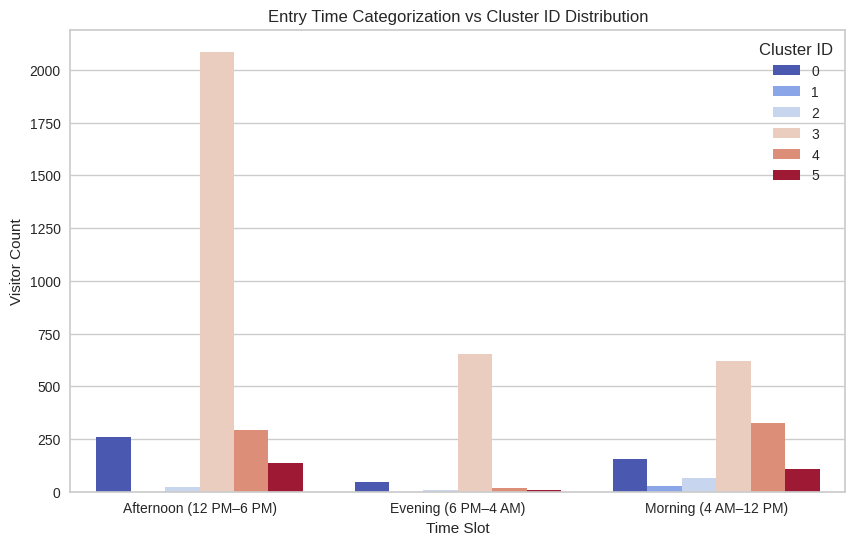

In [ ]:
#Categorization based on the entry time
# Convert entry_time to datetime format
df_filtered["entry_time"] = pd.to_datetime(df_filtered["entry_time"], format="%d-%m-%Y %H:%M:%S")

# Define time slot categorization function
def categorize_time(time):
    if 4 <= time.hour < 12:
        return "Morning (4 AM–12 PM)"
    elif 12 <= time.hour < 18:
        return "Afternoon (12 PM–6 PM)"
    else:
        return "Evening (6 PM–4 AM)"

# Apply categorization
df_filtered["time_slot"] = df_filtered["entry_time"].apply(categorize_time)

#Trasferring clusterid column from df_time to df_filtered. So that we can link both time_slot and clusterid
df_filtered['clusterid'] = df_time['clusterid']


# Display result
print(df_filtered[["entry_time", "time_slot"]])

#Let's link the timeslot and clusterid
time_cluster_counts = df_filtered.groupby(["time_slot", "clusterid"]).size().reset_index(name="count")

#Let's visualize with a plot
plt.figure(figsize=(10, 6))
sns.barplot(x="time_slot", y="count", hue="clusterid", data=time_cluster_counts, palette="coolwarm")
plt.xlabel("Time Slot")
plt.ylabel("Visitor Count")
plt.title("Entry Time Categorization vs Cluster ID Distribution")
plt.legend(title="Cluster ID")
plt.show()


**Observation**


*   Peak activity is observed in Afternoon time slot by clusterID -3
*   Least activity is observed in evening time by most of the clusters except clusterID -3



### Let's visualize using Heat Map

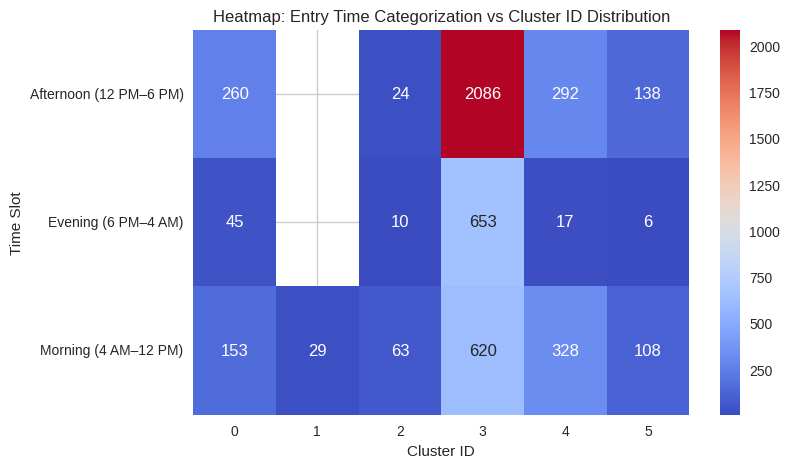

In [ ]:
#Visualize with an HeatMap
heatmap_data = df_filtered.pivot_table(index="time_slot", columns="clusterid", values="entry_time", aggfunc="count")
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Cluster ID")
plt.ylabel("Time Slot")
plt.title("Heatmap: Entry Time Categorization vs Cluster ID Distribution")
plt.show()


**Obervations**:


*   Most people are shopping in afternoon time and they belong to clusterID - 3
*   Least number of people are shopping from Cluster ID - 1



## 1.7 Compare weekend vs. weekday visitor behavior Using the weekday_flag, split the data into weekend and weekday visits. Perform clustering for each subset separately and compare the resulting cluster patterns. Assess whether time spent on different floors or movement patterns differ across these two groups.

In [ ]:
#Create a two data subsets using weekday_flag = 0 and weekday_flag = 1
weekday_visits = df_filtered[df_filtered['weekend_flag'] == 0]
weekend_visits = df_filtered[df_filtered['weekend_flag'] == 1]

In [ ]:
weekend_visits = df_filtered[df_filtered['weekend_flag'] == 1][['weekend_flag', 'clusterid']].copy()

weekend_visits

,weekend_flag,clusterid
128,1,0
130,1,2
132,1,3
135,1,3
137,1,3
...,...,...
7699,1,3
7700,1,3
7702,1,3
7703,1,3


In [ ]:
weekday_visits = df_filtered[df_filtered['weekend_flag'] == 0][['weekend_flag', 'clusterid']].copy()

weekday_visits

,weekend_flag,clusterid
0,0,4
1,0,3
4,0,0
5,0,3
6,0,3
...,...,...
7583,0,4
7586,0,5
7587,0,4
7589,0,3


### Creating a barplot for weekend visits w.r.t to cluster

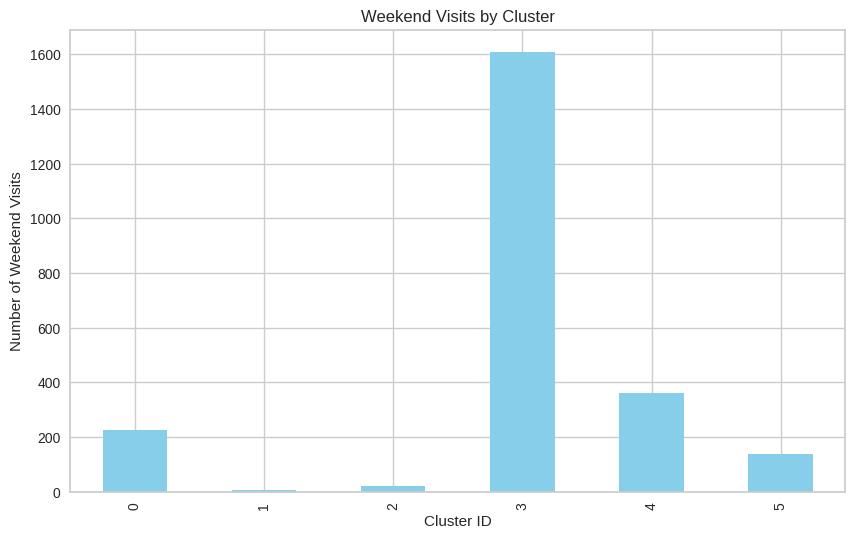

In [ ]:
#Create a bar plot which shows the relationship between the weekend visits and the clusterid
weekend_cluster_counts = weekend_visits['clusterid'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
weekend_cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Weekend Visits')
plt.title('Weekend Visits by Cluster')
plt.show()


**Observation**


1.   Clusterid - 3 has the highest activity
2.   Clusterid - 1 has the least activity



### Creating a barplot for weekday visits w.r.t to cluster

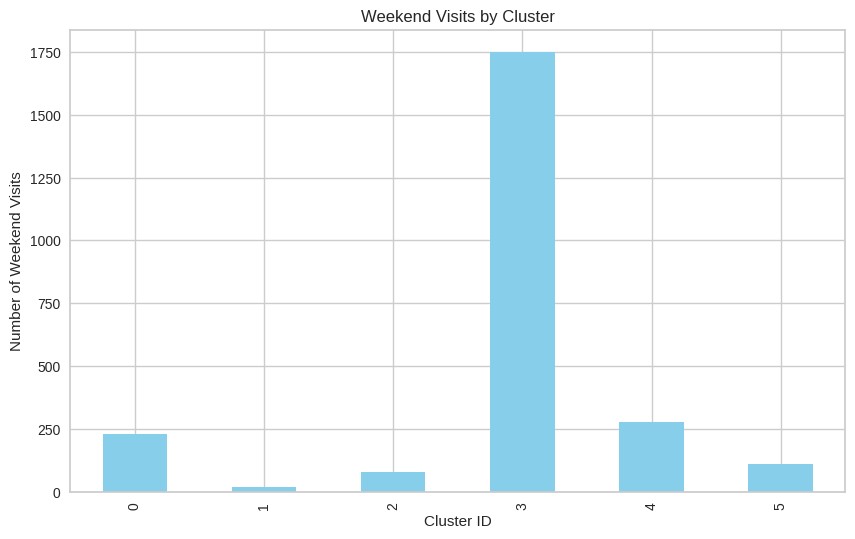

In [ ]:
#Create a bar plot which shows the relationship between the weekend visits and the clusterid
weekend_cluster_counts = weekday_visits['clusterid'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
weekend_cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Weekend Visits')
plt.title('Weekend Visits by Cluster')
plt.show()

**Observation**


1.   Clusterid - 3 has the highest activity
2.   Clusterid - 1 has the least activity

## [Additional Question] weekend & weekday visits w.r.t to duration spent along with their respective clusters

In [ ]:
# Copying the duration column from df_filtered to weeday_visits dataframe
weekday_visits['duration'] = df_filtered['duration']
weekend_visits['duration'] = df_filtered['duration']

In [ ]:
weekday_visits

,weekend_flag,clusterid,duration
0,0,4,19061.0
1,0,3,11517.0
4,0,0,20629.0
5,0,3,3772.0
6,0,3,9120.0
...,...,...,...
7583,0,4,13544.0
7586,0,5,18819.0
7587,0,4,19433.0
7589,0,3,8139.0


#### Heatmap for weekday visits

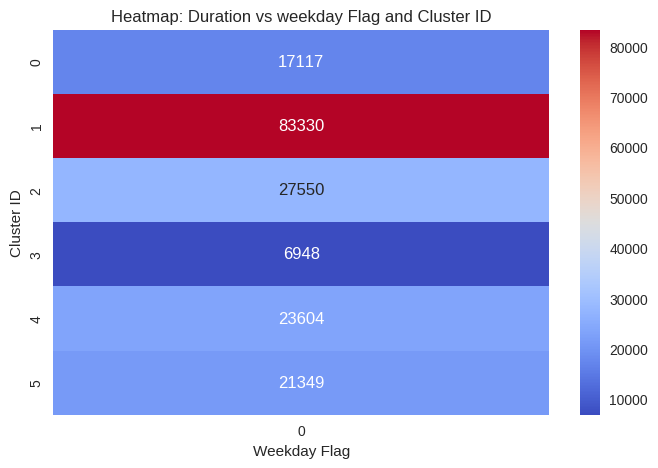

In [ ]:
#Now that we have all the required data let's apply heatmap indivually for weekday_visits
heatmap_data = weekday_visits.pivot_table(index="clusterid", columns="weekend_flag", values="duration", aggfunc="mean")
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Weekday Flag")
plt.ylabel("Cluster ID")
plt.title("Heatmap: Duration vs weekday Flag and Cluster ID")
plt.show()


**Observation**


1. People from clusterid -1 spend more time on weekday even though the total people from clusterid - 1 are less to visit
2.   Least time is spent by people from Cluster id - 3 on weekday



#### Heatmap for weekend visits

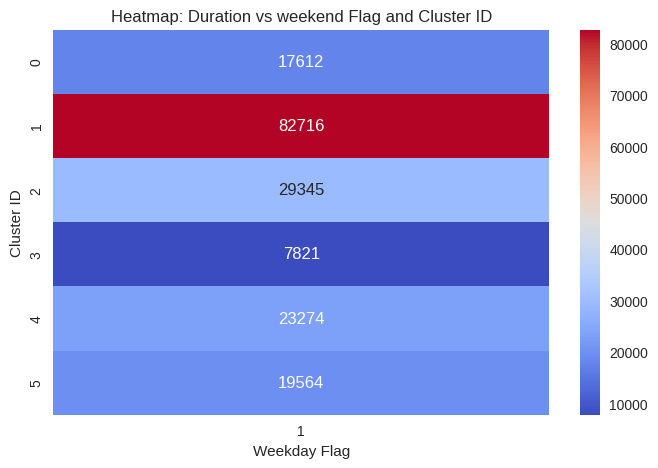

In [ ]:
#Now that we have all the required data let's apply heatmap indivually for weekday_visits
heatmap_data = weekend_visits.pivot_table(index="clusterid", columns="weekend_flag", values="duration", aggfunc="mean")
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Weekday Flag")
plt.ylabel("Cluster ID")
plt.title("Heatmap: Duration vs weekend Flag and Cluster ID")
plt.show()

**Observation**


1. People from clusterid -1 spend more time on weekend even though the total people from clusterid - 1 are less to visit
2.   Least time is spent by people from Cluster id - 3 on weekend